Design your own Convolutional Neural Network to classify images from a reduced version of the
Dogs vs Cats dataset. Use the RELU activation function and the Adam optimiser. Change the other
parameters of the network and hyperparameters to achieve the best accuracy.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile
import os
zip_ref= zipfile.ZipFile('/content/drive/MyDrive/Deep_Learning/A2/dogs-vs-cats-vvsmall.zip','r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# load the libraries
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow import keras


In [5]:
base_dir= '/tmp/dogs-vs-cats-vvsmall' 
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

#Directory with the train cat images
train_cat_dir=os.path.join(train_dir,'cats')

#directory with the train dog images
train_dog_dir=os.path.join(train_dir,'dogs')

#directory with the validation cat images
validation_cat_dir=os.path.join(validation_dir,'cats')

#directory with the  validation dogs images
validation_dog_dir=os.path.join(validation_dir,'dogs')

#get the data set details

In [ ]:
train_cat=os.listdir(train_cat_dir)
print(len(train_cat))
print(train_cat[:5])

3000
['cat.1688.jpg', 'cat.2091.jpg', 'cat.2582.jpg', 'cat.2337.jpg', 'cat.2388.jpg']


In [ ]:
train_dog=os.listdir(train_dog_dir)
print("the length of the training data set of dog is:",len(train_dog))
print(train_dog[:5],"\n")

validation_dog=os.listdir(validation_dog_dir)
print("the length of the validation data set of dog is:",len(validation_dog))
print(validation_dog[:5],"\n")

validation_cat=os.listdir(validation_cat_dir)
print("the length of the validation data set of cat is:",len(validation_cat))
print(validation_dog[:5],"\n")

the length of the training data set of dog is: 3000
['dog.1538.jpg', 'dog.2857.jpg', 'dog.590.jpg', 'dog.1709.jpg', 'dog.334.jpg'] 

the length of the validation data set of dog is: 900
['dog.9166.jpg', 'dog.8656.jpg', 'dog.9348.jpg', 'dog.9151.jpg', 'dog.9340.jpg'] 

the length of the validation data set of cat is: 900
['dog.9166.jpg', 'dog.8656.jpg', 'dog.9348.jpg', 'dog.9151.jpg', 'dog.9340.jpg'] 



In [ ]:

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(300,300,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:

history=model.fit( train_generator,  
                    validation_data = validation_generator,
                    epochs=15
                  )    

Epoch 1/15
188/188 [==============================] - 868s 5s/step - loss: 0.6892 - accuracy: 0.5260 - val_loss: 0.6891 - val_accuracy: 0.5606
Epoch 2/15
188/188 [==============================] - 857s 5s/step - loss: 0.6888 - accuracy: 0.5367 - val_loss: 0.6743 - val_accuracy: 0.5906
Epoch 3/15
188/188 [==============================] - 828s 4s/step - loss: 0.6625 - accuracy: 0.6058 - val_loss: 0.6693 - val_accuracy: 0.5689
Epoch 4/15
188/188 [==============================] - 826s 4s/step - loss: 0.6236 - accuracy: 0.6568 - val_loss: 0.6292 - val_accuracy: 0.6261
Epoch 5/15
188/188 [==============================] - 831s 4s/step - loss: 0.5632 - accuracy: 0.7117 - val_loss: 0.5441 - val_accuracy: 0.7311
Epoch 6/15
188/188 [==============================] - 823s 4s/step - loss: 0.5091 - accuracy: 0.7448 - val_loss: 0.5455 - val_accuracy: 0.7250
Epoch 7/15
188/188 [==============================] - 802s 4s/step - loss: 0.4834 - accuracy: 0.7678 - val_loss: 0.4823 - val_accuracy: 0.7822

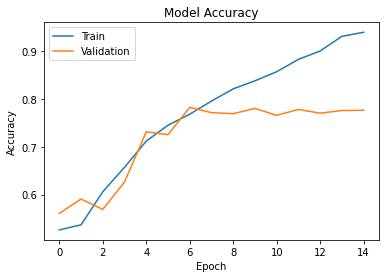

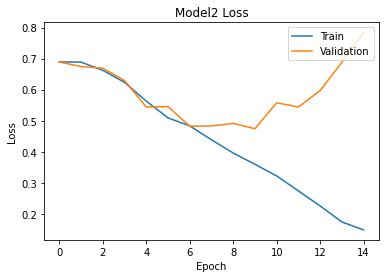

In [9]:

# Train the model and record the training history
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation accuracy curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set up the model architecture
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(300,300,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

# Set up the optimizer and compile the model
adam = Adam(lr=0.001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history1 = model1.fit(train_generator, epochs=100, validation_data=validation_generator, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(validation_generator)
print('Test accuracy:', test_acc)


Epoch 1/100
188/188 [==============================] - 920s 5s/step - loss: 0.6918 - accuracy: 0.5348 - val_loss: 0.6979 - val_accuracy: 0.4894
Epoch 2/100
188/188 [==============================] - 909s 5s/step - loss: 0.6739 - accuracy: 0.5782 - val_loss: 0.6527 - val_accuracy: 0.6044
Epoch 3/100
188/188 [==============================] - 908s 5s/step - loss: 0.6596 - accuracy: 0.5998 - val_loss: 0.7085 - val_accuracy: 0.5161
Epoch 4/100
188/188 [==============================] - 908s 5s/step - loss: 0.6414 - accuracy: 0.6202 - val_loss: 0.6139 - val_accuracy: 0.6583
Epoch 5/100
188/188 [==============================] - 876s 5s/step - loss: 0.6207 - accuracy: 0.6455 - val_loss: 0.6454 - val_accuracy: 0.6222
Epoch 6/100
188/188 [==============================] - 862s 5s/step - loss: 0.5943 - accuracy: 0.6818 - val_loss: 0.6237 - val_accuracy: 0.6556
Epoch 7/100
188/188 [==============================] - 864s 5s/step - loss: 0.5734 - accuracy: 0.7030 - val_loss: 0.5741 - val_accuracy:

In [1]:

# Plot the training and validation accuracy curves
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

NameError: ignored

In [ ]:
loss, accuracy = model1.evaluate(validation_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


In [7]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
# Flow training images in batches of 32 using train_datagen generator
train_generator1 = train_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/train',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator1 = validation_datagen.flow_from_directory(
        '/tmp/dogs-vs-cats-vvsmall/validation',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 6000 images belonging to 2 classes.
Found 1800 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set up the model architecture
model1 = Sequential()
model1.add(Conv2D(filters=16, kernel_size=(3,3), strides=1,activation='relu', padding='same', input_shape=(200,200,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=32, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Conv2D(filters=64, kernel_size=(3,3), strides=1,activation='relu', padding='same'))
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(512, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))

# Set up the optimizer and compile the model
adam = Adam(lr=0.001)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# Train the model
history1 = model1.fit(train_generator1, epochs=100, validation_data=validation_generator1, callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(validation_generator1)
print('Test accuracy:', test_acc)


Epoch 1/100
188/188 [==============================] - 429s 2s/step - loss: 0.6945 - accuracy: 0.5085 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/100
188/188 [==============================] - 420s 2s/step - loss: 0.6933 - accuracy: 0.4948 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/100
188/188 [==============================] - 428s 2s/step - loss: 0.6938 - accuracy: 0.4965 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 4/100
188/188 [==============================] - 438s 2s/step - loss: 0.6936 - accuracy: 0.5027 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/100
188/188 [==============================] - 430s 2s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 6/100
188/188 [==============================] - 421s 2s/step - loss: 0.6919 - accuracy: 0.5212 - val_loss: 0.6825 - val_accuracy: 0.5806
Epoch 7/100
188/188 [==============================] - 427s 2s/step - loss: 0.6906 - accuracy: 0.5420 - val_loss: 0.6922 - val_accuracy:

In [ ]:

# Plot the training and validation accuracy curves
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

#second check with some data augmentation techniques

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)
test_datagen2 = ImageDataGenerator(rescale=1./255)

#Training Set
train_set2 = train_datagen2.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/train',
                                             target_size=(64,64),
                                             batch_size=32,
                                             class_mode='binary')
#Validation Set
test_set2 = test_datagen2.flow_from_directory('/tmp/dogs-vs-cats-vvsmall/validation',
                                           target_size=(64,64),
                                           batch_size = 32,
                                           class_mode='binary',
                                           shuffle=False)


In [ ]:
import tensorflow
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
model2.add(Conv2D(32,(3,3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2,2),strides=2))
model2.add(Flatten())
model2.add(Dense(units=128,activation='relu'))
model2.add(Dense(units=1,activation='sigmoid'))
adam = tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model2.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history2=model2.fit_generator(train_set2,
                        #steps_per_epoch=800, 
                        epochs = 50,
                        validation_data = test_set2,
                        #validation_steps = 20, 
                        #callbacks=[tensorboard]
                        callbacks=[early_stop]
                        );

In [ ]:
history2.summary()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model2.evaluate(test_set2)
print('Test accuracy:', test_acc)

In [ ]:
# Plot the training and validation accuracy curves
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss curves
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()